### Sets
- A set is an unordered collection of items (referred to as elements) with no duplicates   


- Sets can contain cunbers, strings, tuples, and Boolean values  
- Some examples of sets are {"spam", "ni"}, {3, 4, 7}  
- Sets cannot contain lists or other sets  
- Since the elements have no order, they cannot be indexed
    - Slicing and list methods such as sord and reverse are meaningless


- Useful set operations include membership test, subset test, intersection, and so on

In [3]:
bri = {'brazil', 'russia', 'india'}
print('india' in bri)
print('usa' in bri)
bric = bri.copy()
print(bric)
bric.add('china')
print(bric)
bri.remove('russia')   # or bri.discard('russia')
print(bri)
print(bric.issuperset(bri))   # or bri.issubset(bric)
print(bri & bric)   # or bri.intersection(bric)
print(bric.union(bri))

True
False
{'brazil', 'india', 'russia'}
{'china', 'brazil', 'india', 'russia'}
{'brazil', 'india'}
True
{'brazil', 'india'}
{'china', 'india', 'brazil', 'russia'}


- List, tuple, and set can be converted to one another by using the functions __list, tuple and set__.

In [7]:
words = ['nudge', 'nudge', 'wink', 'wink']
print(tuple(words))
terms = set(words)
print(terms)
print(list(terms))
alpha = ('a', 'b', 'c')
print(set(alpha))
terms.clear()
print(terms)

('nudge', 'nudge', 'wink', 'wink')
{'nudge', 'wink'}
['nudge', 'wink']
{'a', 'c', 'b'}
set()


- Although the elements of a set cannot be ordered, they can be placed into a list in a customized order using the __sorted__ function

In [9]:
bric = {'brazil', 'china', 'india', 'russia'}
print(bric)
sorted(bric)
sorted(bric, key=len, reverse=True)
print(bric)

{'china', 'brazil', 'india', 'russia'}
{'china', 'brazil', 'india', 'russia'}


- Like lists, sets can be created with comprehension

- The following is a rewrite of the example program on using set methods to create a file containing the names of presidents who also served as vice president

In [13]:
def main():
    ## Create a file of the presidents who also served
    # as vice-presidents.
    vicePresSet = createSetFromFile("VPres.txt")
    presSet = createSetFromFile("USPres.txt")
    bothPresAndVPresSet = createIntersection(vicePresSet, presSet)
    writeNamesToFile(bothPresAndVPresSet, "PresAndVPres.txt")

def createSetFromFile(fileName):
    # Assume that the last line of the file ends with
    # a newline character.
    infile = open(fileName, 'r')
    namesSet = {name for name in infile}
    infile.close()
    return namesSet

def createIntersection(set1, set2):
    return set1.intersection(set2)

def writeNamesToFile(setName, fileName):
    outfile = open(fileName, 'w')
    outfile.writelines(setName)
    outfile.close()

main()

- Set operations(words = {'spam', 'ni'})

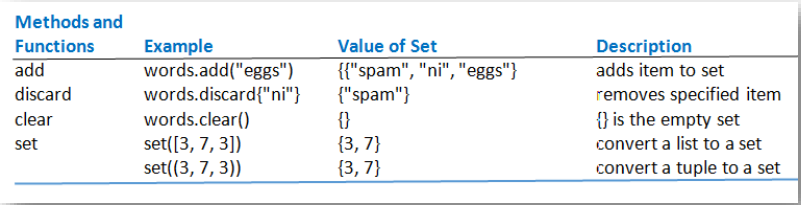

In [18]:
print({1, 2, 3} | {3, 4}, # set uniou
    {1, 2, 3} & {3, 4}, # set intersection
    {1, 2, 3} - {3, 4}, # set difference
    {1, 2, 3} ^ {3, 4}, # symmetric difference
    3 in {1, 2, 3}) # is an element of
x = {1, 2, 3} - {3, 4}
print(x, end=" ")
x.add(5)
print(x,)
y = x.copy()
print(y, end=" ")
y.discard
print(y)

{1, 2, 3, 4} {3} {1, 2} {1, 2, 4} True
{1, 2} {1, 2, 5}
{1, 2, 5} {1, 2, 5}


### CSV Files
- Text files considered so far had a single piece of data per line
- Consider CSV(comma separated values) formatted file
     - several times of data on each line
     - Items separated by commas
- The file __UN.txt__ contains the members of UN
    - Countries listed in alphabetical order
    - Each record contains data about a country: name, continent, population (in million), land area(in square miles)

In [19]:
def main():
    ## Display the countries in a specified continent.
    continent = input("Enter the name of a continent: ")
    continent = continent.title()   # Allow for all lower
    if continent != "Antarctica":
        infile = open("UN.txt", 'r')
        for line in infile:
            data = line.split(',')
            if data[1] == continent:
                print(data[0])
    else:
        print("There are no countries in Antarctica.")
main()

Enter the name of a continent: South America
Argentina
Bolivia
Brazil
Chile
Colombia
Ecuador
Guyana
Paraguay
Peru
Suriname
Uruguay
Venezuela


### Analyzing the Data in a CSV File with a List
- Data can be analyzed by placing data into a list
    - Items of the list are other lists holding the contents of a single line of the file

In [21]:
def main():
    ## Create a file containing all countries and areas,
    ## ordered by area.
    ## Display first five lines of the file.
    countries = placeRecordsIntoList("UN.txt")
    countries.sort(key=lambda country: country[3], reverse=True)
    displayFiveLargestCountries(countries)
    createNewFile(countries)   # Create file of countries and their areas.
    
def placeRecordsIntoList(fileName):
    infile = open(fileName, 'r')
    listOfRecords = [line.rstrip() for line in infile]
    infile.close()
    for i in range(len(listOfRecords)):
        listOfRecords[i] = listOfRecords[i].split(',')
        listOfRecords[i][2] = eval(listOfRecords[i][2])   # population
        listOfRecords[i][3] = eval(listOfRecords[i][3])   # area
        
    return listOfRecords

def displayFiveLargestCountries(countries):
    print("{0:20}{1:9}".format("Country", "Area (sq. mi.)"))
    for i in range(5):
        print("{0:20}{1:9,d}".format(countries[i][0], countries[i][3]))
        
def createNewFile(countries):
    outfile = open("UNbyArea.txt", 'w')
    for country in countries:
        outfile.write(country[0] + ',' + str(country[3]) + "\n")
    outfile.close()
    
main()

Country             Area (sq. mi.)
Russian Federation  6,592,800
Canada              3,855,000
United States       3,794,066
China               3,696,100
Brazil              3,287,597


- The first three lines of the CSV file __UNbyArea.txt__ are <img src = "images\c1.png">


- CSV files can be converted to Excel spreadsheets
    - Open UN.txt file in Excel, select comma when asked for delimiter
- Spreadsheets can be converted to CSV files
    - Click on "Save As" from the FILE menu, choose "CSV(Comma delimited)" in the "Save as type" dropdown box

### Dictionary
- A dictionary is a collection of comma-separated pairs of the form
    d = {key1:value1, key2:valu2, ...}
    - The keys must be unique immutable objects(such as strings, numbers, or tuples)
    - The value associated with __key1__ is given by the expression d[key1]
    

- The __dict__ function convers a list of two-item lists or two-item tuples into a dictionary

In [27]:
list1 = [["one", 1], ["two", 2], ["three", 3]]
dict(list1)
list2 =[("one", 1), ("two", 2), ("three", 3)]
dict(list2)

addr = { 'Swaroop'    : 'swaroop@swaroopch.com',
          'Larry'     : 'larry@wall.org',
          'Matsumoto' : 'matz@ruby-lang.org',
          'Spammer'   : 'spammer@hotmail.com'}
print("Swaroop's address is", addr['Swaroop'])

# Deleting a key-value pair
del addr['Spammer']
print('\nThere are {} contacts in the address-book\n' \
     .format(len(addr)))

for name, address in list(addr.items()):
    print('Contact {} at {}'.format(name, address))
    
# Adding a key-value pair
addr["Guido"] = 'guido@python.org'
if 'Guido' in addr:
    print("\nGuido's address is", addr['Guido'])

Swaroop's address is swaroop@swaroopch.com

There are 3 contacts in the address-book

Contact Swaroop at swaroop@swaroopch.com
Contact Larry at larry@wall.org
Contact Matsumoto at matz@ruby-lang.org

Guido's address is guido@python.org


- The operation list(d.item()) returns a list of tuples where each tuple contains a key value pair
- New key-value pairs can be added by simply using the indexing operator to access a key and assign its value
- Dictionary operations:  
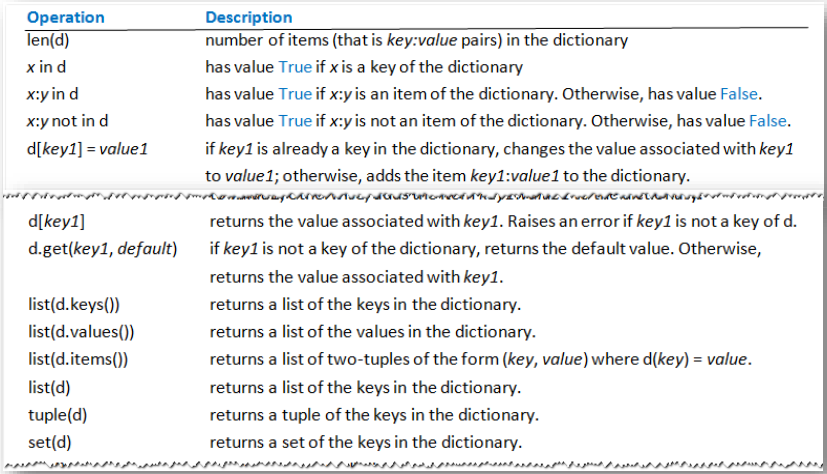

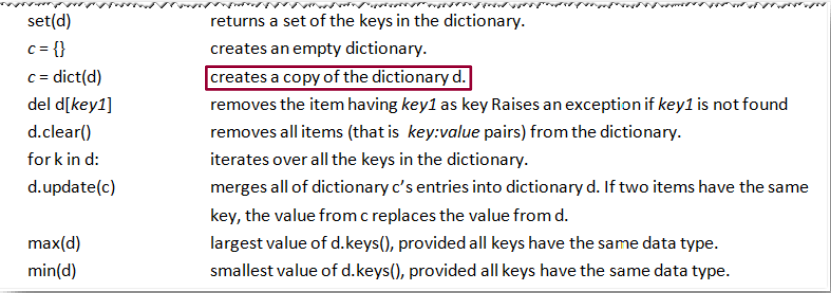

### Using a Dictionary to Simplify a Long if-elif
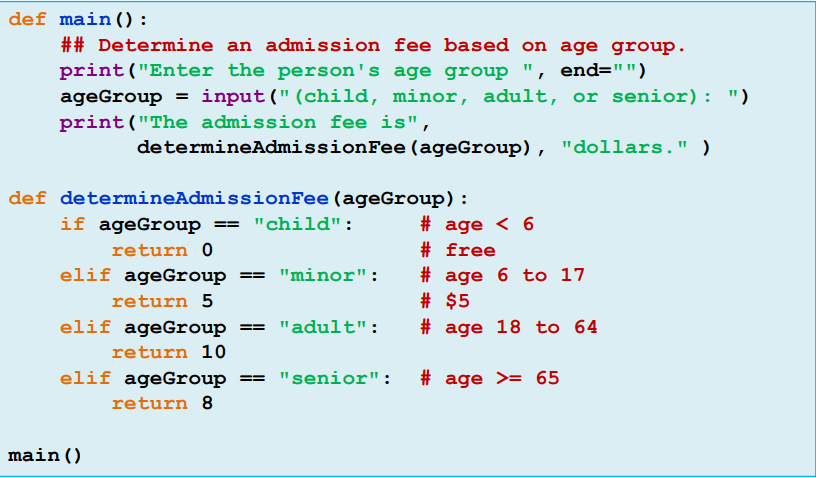

- The rewrite of determineAdmissionFee function below, replaces the if-elif statement with a discionary


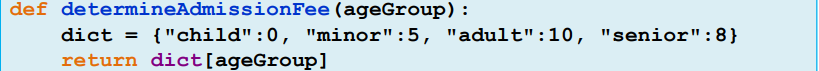

### Using a Dictionary as a Frequency table
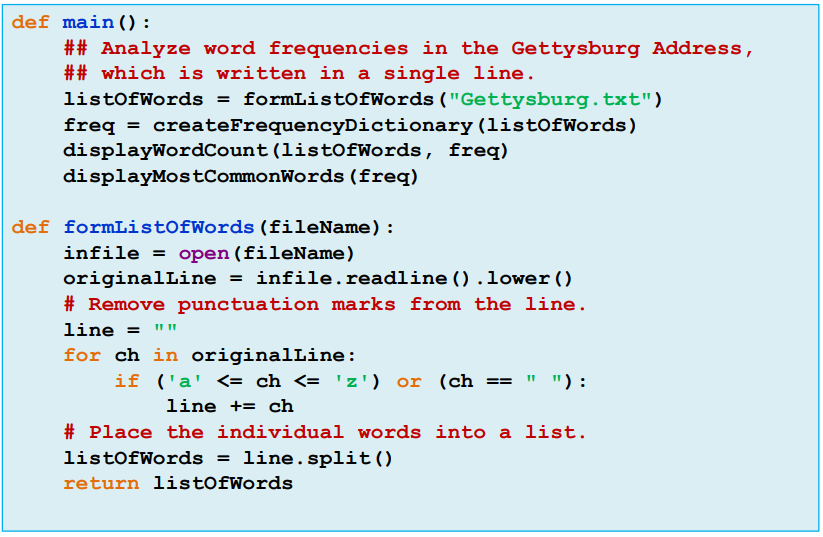

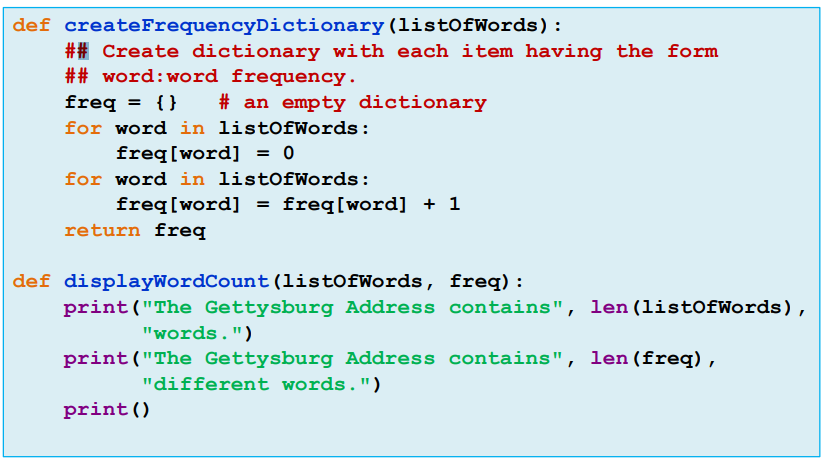

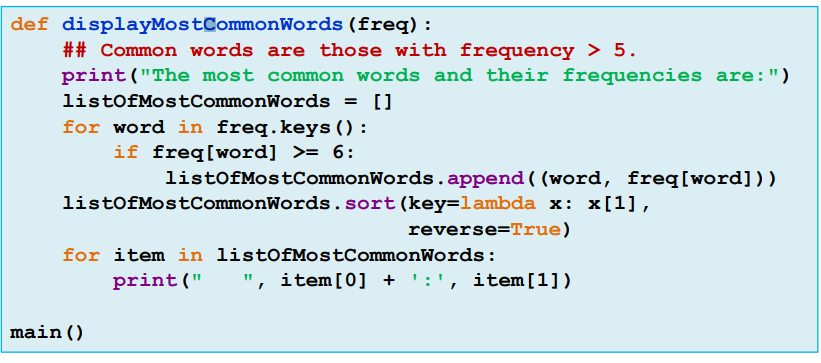

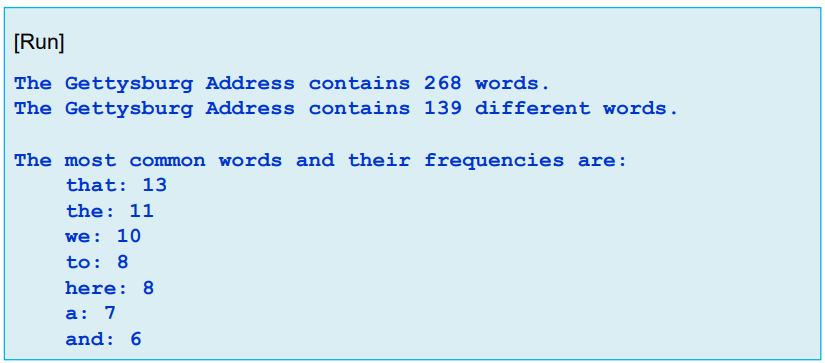

###  Sorting Dictionaries in Binary Files
- Methods that store dictionaries to, and retrieve dictionaries from binary files must be imported from a module named pickle 
    - Binary format can only be accessed by special readers

In [31]:
import pickle

outfile = open("Binary File.txt", 'wb')
pickle.dump(addr, outfile)                  # 위에서 addr을 썼다.
outfile.close()

infile = open("Binary File.txt", 'rb')
addr2 = pickle.load(infile)
infile.close()

print(addr2)

{'Swaroop': 'swaroop@swaroopch.com', 'Larry': 'larry@wall.org', 'Matsumoto': 'matz@ruby-lang.org', 'Guido': 'guido@python.org'}


- Dictoinary's values can be any type of object of object including a dictionary

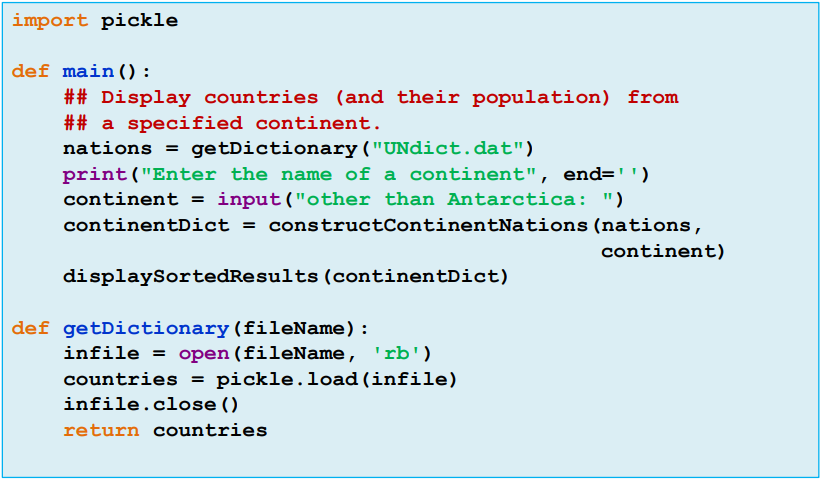

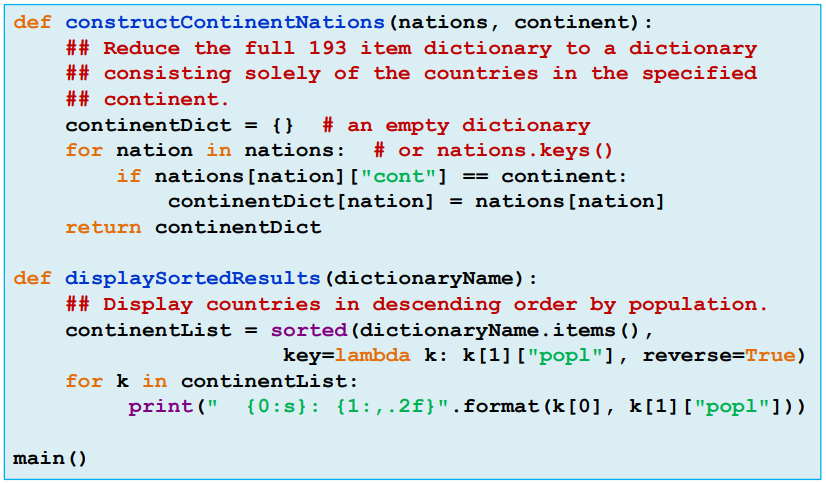

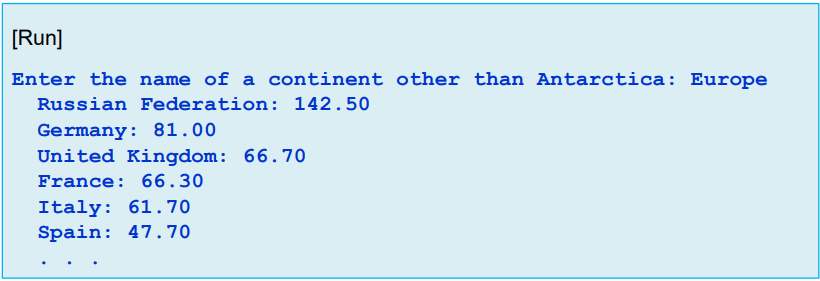

### Using a Dictionary with Tuples as Keys
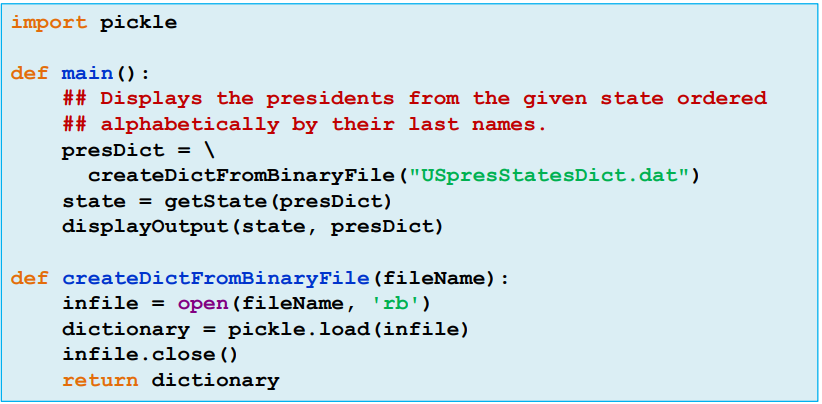

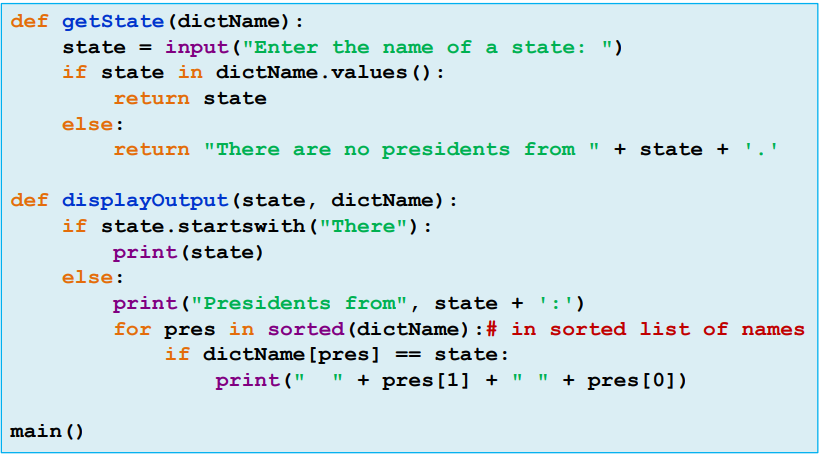

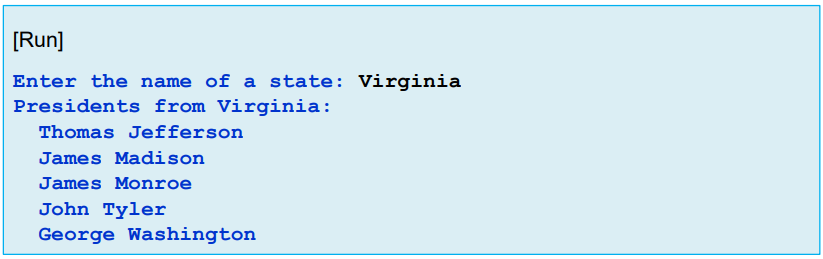

### Dictionary Comprehension

- Dictionaries can be created with dictionary comprehension, e.g.,  
    {x: x * x for in range(4)}
- Dictionary comprehension can be used to extract a subset of a dictionary, e.g.,  
    NE = {"Maine", "Connecticut", "New Hampshire", "Massachusetts", "Vermont", Rhode Island"}
    subSet = {key: presDict{key} for in presDict if presDict[key] in NE}